In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importation des données

### Simple algorithme

In [6]:
file_path = "./data-simple-fractal/results.json" 

if not os.path.exists(file_path):
    print(f"Le fichier {file_path} est introuvable. Veuillez vérifier le chemin.")
else:
    try:
        data = pd.read_json(file_path)
        print("Fichier JSON lu avec succès.")
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier JSON : {e}")

data.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal_simple,"[-h, 1000, -w, 1000]",0.19,9.39,49.11
1,../fractal/fractal_simple,"[-h, 1000, -w, 1500]",0.26,12.78,48.90
2,../fractal/fractal_simple,"[-h, 1000, -w, 2000]",0.34,16.69,48.81
3,../fractal/fractal_simple,"[-h, 1000, -w, 2500]",0.42,20.62,48.93
4,../fractal/fractal_simple,"[-h, 1000, -w, 3000]",0.61,29.93,49.36


In [7]:
def params_to_dict(params):
    return {params[i]: params[i + 1] for i in range(0, len(params), 2)}

param_dicts = data['params'].apply(params_to_dict)
param_df = pd.DataFrame(param_dicts.tolist())

data = pd.concat([data.drop(columns=['params']), param_df], axis=1)
data = data.apply(pd.to_numeric, errors='ignore')

data

/tmp/ipykernel_141105/429555552.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w
0,../fractal/fractal_simple,0.19,9.39,49.11,1000,1000
1,../fractal/fractal_simple,0.26,12.78,48.90,1000,1500
2,../fractal/fractal_simple,0.34,16.69,48.81,1000,2000
3,../fractal/fractal_simple,0.42,20.62,48.93,1000,2500
4,../fractal/fractal_simple,0.61,29.93,49.36,1000,3000
...,...,...,...,...,...,...
356,../fractal/fractal_simple,15.43,753.29,48.82,10000,8000
357,../fractal/fractal_simple,16.50,810.81,49.13,10000,8500
358,../fractal/fractal_simple,17.43,866.40,49.70,10000,9000
359,../fractal/fractal_simple,18.34,894.49,48.76,10000,9500


### optimisation 1

In [13]:
file_path_opti1 = "./data-opti1-fractal/results.json" 

if not os.path.exists(file_path_opti1):
    print(f"Le fichier {file_path_opti1} est introuvable. Veuillez vérifier le chemin.")
else:
    try:
        data_opti1 = pd.read_json(file_path_opti1)
        print("Fichier JSON lu avec succès.")
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier JSON : {e}")

data_opti1.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal_simple,"[-h, 4500, -w, 4500]",3.85,207.19,53.79
1,../fractal/fractal_simple,"[-h, 4500, -w, 5000]",4.22,227.39,53.92
2,../fractal/fractal_simple,"[-h, 4500, -w, 5500]",4.70,253.26,53.89
3,../fractal/fractal_simple,"[-h, 4500, -w, 6000]",5.17,279.89,54.19
4,../fractal/fractal_simple,"[-h, 4500, -w, 6500]",5.48,297.43,54.26


In [14]:
def params_to_dict(params):
    return {params[i]: params[i + 1] for i in range(0, len(params), 2)}

param_dicts = data_opti1['params'].apply(params_to_dict)
param_df = pd.DataFrame(param_dicts.tolist())

data_opti1 = pd.concat([data_opti1.drop(columns=['params']), param_df], axis=1)
data_opti1 = data_opti1.apply(pd.to_numeric, errors='ignore')

data_opti1

/tmp/ipykernel_141105/676423979.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_opti1 = data_opti1.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w
0,../fractal/fractal_simple,3.85,207.19,53.79,4500,4500
1,../fractal/fractal_simple,4.22,227.39,53.92,4500,5000
2,../fractal/fractal_simple,4.70,253.26,53.89,4500,5500
3,../fractal/fractal_simple,5.17,279.89,54.19,4500,6000
4,../fractal/fractal_simple,5.48,297.43,54.26,4500,6500
5,../fractal/fractal_simple,5.89,317.87,54.01,4500,7000
6,../fractal/fractal_simple,6.41,347.54,54.21,4500,7500
7,../fractal/fractal_simple,4.25,228.66,53.78,5000,4500
8,../fractal/fractal_simple,4.80,262.27,54.60,5000,5000
9,../fractal/fractal_simple,5.25,285.62,54.40,5000,5500


### Optimisation2

In [17]:
file_path_opti2 = "./data-opti2-fractal/results.json" 

if not os.path.exists(file_path_opti2):
    print(f"Le fichier {file_path_opti2} est introuvable. Veuillez vérifier le chemin.")
else:
    try:
        data_opti2 = pd.read_json(file_path_opti2)
        print("Fichier JSON lu avec succès.")
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier JSON : {e}")

data_opti2.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal_simple,"[-h, 4500, -w, 4500]",3.76,197.30,52.44
1,../fractal/fractal_simple,"[-h, 4500, -w, 5000]",4.23,226.60,53.55
2,../fractal/fractal_simple,"[-h, 4500, -w, 5500]",4.57,245.76,53.73
3,../fractal/fractal_simple,"[-h, 4500, -w, 6000]",5.09,275.91,54.20
4,../fractal/fractal_simple,"[-h, 4500, -w, 6500]",5.44,292.85,53.85


In [18]:
param_dicts = data_opti2['params'].apply(params_to_dict)
param_df = pd.DataFrame(param_dicts.tolist())

data_opti2 = pd.concat([data_opti2.drop(columns=['params']), param_df], axis=1)
data_opti2 = data_opti2.apply(pd.to_numeric, errors='ignore')

data_opti2

/tmp/ipykernel_141105/1869708312.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_opti2 = data_opti2.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w
0,../fractal/fractal_simple,3.76,197.30,52.44,4500,4500
1,../fractal/fractal_simple,4.23,226.60,53.55,4500,5000
2,../fractal/fractal_simple,4.57,245.76,53.73,4500,5500
3,../fractal/fractal_simple,5.09,275.91,54.20,4500,6000
4,../fractal/fractal_simple,5.44,292.85,53.85,4500,6500
5,../fractal/fractal_simple,5.91,316.21,53.51,4500,7000
6,../fractal/fractal_simple,6.34,343.91,54.27,4500,7500
7,../fractal/fractal_simple,4.22,228.49,54.13,5000,4500
8,../fractal/fractal_simple,4.72,255.69,54.16,5000,5000
9,../fractal/fractal_simple,5.16,277.67,53.79,5000,5500


### Optimisation3

In [22]:
file_path_opti3 = "./data-opti2-fractal/results.json" 

if not os.path.exists(file_path_opti3):
    print(f"Le fichier {file_path_opti3} est introuvable. Veuillez vérifier le chemin.")
else:
    try:
        data_opti3 = pd.read_json(file_path_opti3)
        print("Fichier JSON lu avec succès.")
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier JSON : {e}")

data_opti3.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal_simple,"[-h, 4500, -w, 4500]",3.76,197.30,52.44
1,../fractal/fractal_simple,"[-h, 4500, -w, 5000]",4.23,226.60,53.55
2,../fractal/fractal_simple,"[-h, 4500, -w, 5500]",4.57,245.76,53.73
3,../fractal/fractal_simple,"[-h, 4500, -w, 6000]",5.09,275.91,54.20
4,../fractal/fractal_simple,"[-h, 4500, -w, 6500]",5.44,292.85,53.85


In [23]:
param_dicts = data_opti3['params'].apply(params_to_dict)
param_df = pd.DataFrame(param_dicts.tolist())

data_opti3 = pd.concat([data_opti3.drop(columns=['params']), param_df], axis=1)
data_opti3 = data_opti3.apply(pd.to_numeric, errors='ignore')

data_opti3

/tmp/ipykernel_141105/2537083852.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_opti3 = data_opti3.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w
0,../fractal/fractal_simple,3.76,197.30,52.44,4500,4500
1,../fractal/fractal_simple,4.23,226.60,53.55,4500,5000
2,../fractal/fractal_simple,4.57,245.76,53.73,4500,5500
3,../fractal/fractal_simple,5.09,275.91,54.20,4500,6000
4,../fractal/fractal_simple,5.44,292.85,53.85,4500,6500
5,../fractal/fractal_simple,5.91,316.21,53.51,4500,7000
6,../fractal/fractal_simple,6.34,343.91,54.27,4500,7500
7,../fractal/fractal_simple,4.22,228.49,54.13,5000,4500
8,../fractal/fractal_simple,4.72,255.69,54.16,5000,5000
9,../fractal/fractal_simple,5.16,277.67,53.79,5000,5500


# Analyse des données

## Premier aperçu

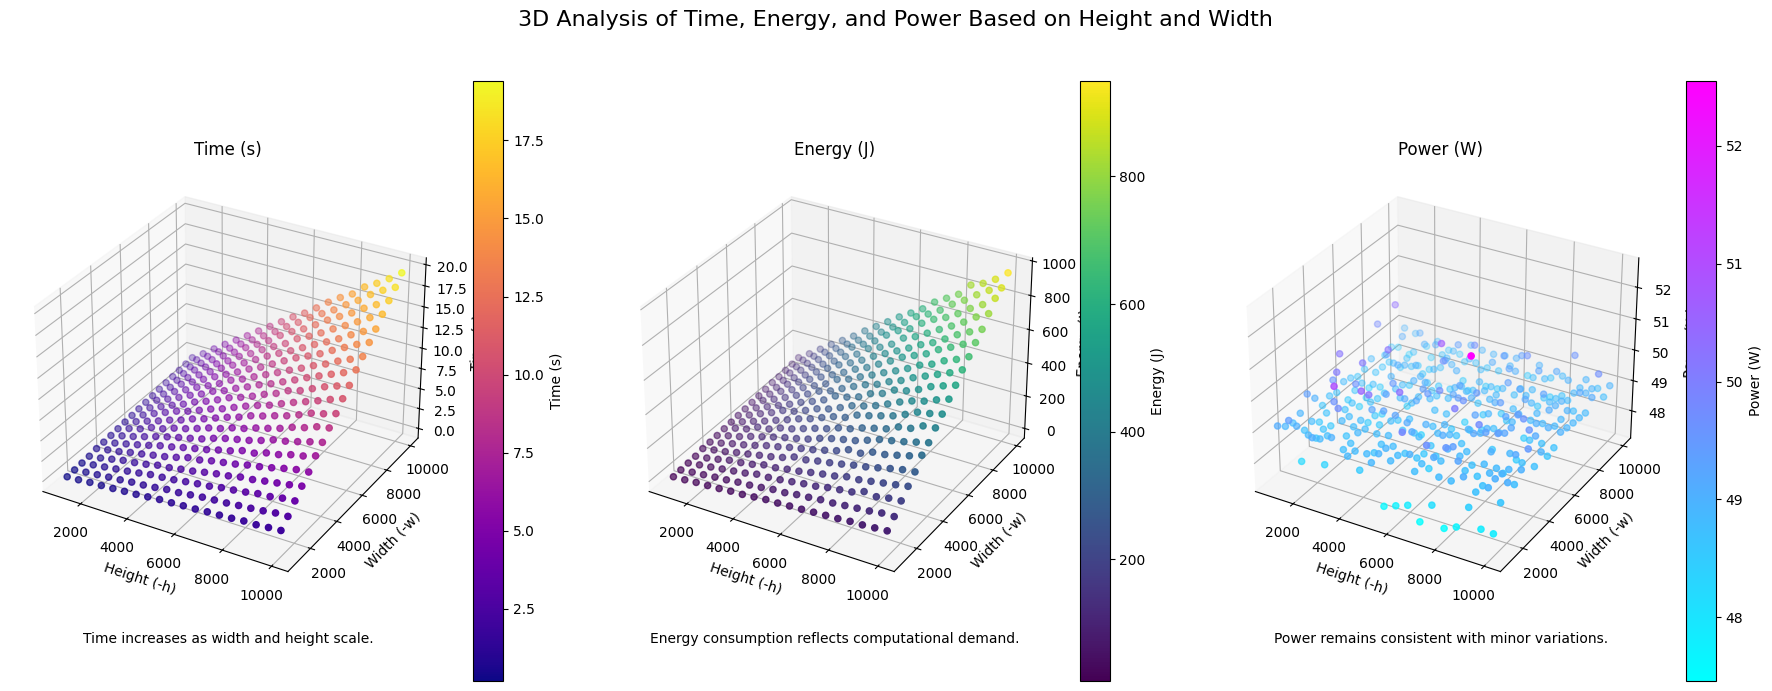

In [8]:
fig = plt.figure(figsize=(18, 7))
fig.suptitle('3D Analysis of Time, Energy, and Power Based on Height and Width', fontsize=16)

ax1 = fig.add_subplot(131, projection='3d')
sc_time = ax1.scatter(data['-h'], data['-w'], data['time'], c=data['time'], cmap='plasma', label='Time')
ax1.set_title('Time (s)')
ax1.set_xlabel('Height (-h)')
ax1.set_ylabel('Width (-w)')
ax1.set_zlabel('Time (s)')
plt.colorbar(sc_time, ax=ax1, label='Time (s)')
ax1.text2D(0.5, -0.1, "Time increases as width and height scale.", transform=ax1.transAxes, fontsize=10, ha='center')

ax2 = fig.add_subplot(132, projection='3d')
sc_energy = ax2.scatter(data['-h'], data['-w'], data['energy'], c=data['energy'], cmap='viridis', label='Energy')
ax2.set_title('Energy (J)')
ax2.set_xlabel('Height (-h)')
ax2.set_ylabel('Width (-w)')
ax2.set_zlabel('Energy (J)')
plt.colorbar(sc_energy, ax=ax2, label='Energy (J)')
ax2.text2D(0.5, -0.1, "Energy consumption reflects computational demand.", transform=ax2.transAxes, fontsize=10, ha='center')

ax3 = fig.add_subplot(133, projection='3d')
sc_power = ax3.scatter(data['-h'], data['-w'], data['power'], c=data['power'], cmap='cool', label='Power')
ax3.set_title('Power (W)')
ax3.set_xlabel('Height (-h)')
ax3.set_ylabel('Width (-w)')
ax3.set_zlabel('Power (W)')
plt.colorbar(sc_power, ax=ax3, label='Power (W)')
ax3.text2D(0.5, -0.1, "Power remains consistent with minor variations.", transform=ax3.transAxes, fontsize=10, ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Introduction de l’Indicateur : Energy-Delay Product (EDP)

Pour évaluer les performances de nos différentes implémentations, nous proposons d’utiliser un indicateur combinant à la fois le temps d’exécution et l’énergie consommée. Une métrique couramment utilisée dans le domaine des systèmes et de l’informatique verte est le **Energy-Delay Product (EDP)**.

**Définition :**  

$$
\text{EDP} = \text{Temps d’exécution} \times \text{Énergie consommée}
$$

- Le temps d’exécution est généralement exprimé en secondes.
- L’énergie consommée, dans notre cas, est en Joules.

En réduisant simultanément le temps et la consommation, un EDP plus faible signifie une meilleure performance globale.

In [9]:
data['EDP'] = data['time'] * data['energy']
data.head()

,command,time,energy,power,-h,-w,EDP
0,../fractal/fractal_simple,0.19,9.39,49.11,1000,1000,1.7841
1,../fractal/fractal_simple,0.26,12.78,48.90,1000,1500,3.3228
2,../fractal/fractal_simple,0.34,16.69,48.81,1000,2000,5.6746
3,../fractal/fractal_simple,0.42,20.62,48.93,1000,2500,8.6604
4,../fractal/fractal_simple,0.61,29.93,49.36,1000,3000,18.2573


In [10]:
data[['EDP']].describe()

,EDP
count,361.000000
mean,2625.213715
std,3511.377676
min,1.784100
25%,255.060200
50%,1091.825900
75%,3699.659600
max,18417.972000


In [11]:
pivot = data.pivot_table(values=['EDP',], index='-h', columns='-w')
pivot

EDP                                                       \
-w        1000      1500      2000       2500       3000       3500    
-h                                                                     
1000     1.7841    3.3228    5.6746     8.6604    18.2573    21.5028   
1500     3.5505    9.0945   15.3104    20.1280    38.4391    46.8342   
2000     7.8040   15.8289   27.2850    42.7512    61.0288    86.1849   
2500    10.7489   25.4016   44.0420    76.3716   102.6310   132.7425   
3000    15.2208   34.4736   63.5173    97.0362   142.5969   197.3619   
3500    22.7331   49.6718   88.8435   132.7590   194.8000   285.4404   
4000    28.0288   59.9067  130.6354   196.3566   251.2663   359.7480   
4500    40.1310   78.9940  145.4065   220.8597   334.6264   461.4786   
5000    53.7180  107.2260  173.2984   279.0803   462.0447   560.6406   
5500    58.6302  117.4900  215.4180   331.5744   500.3834   665.1225   
6000    70.1195  150.9276  259.4630   411.3285   605.9598   808.7376   
6500    78.5792  179.2320  295.7166   490.4196   693.7434   963.0820   
7000    94.2726  207.1416  369.2150   556.7536   795.1190  1197.6099   
7500   105.1984  223.8226  419.8257   672.4287   928.8544  1235.1668   
8000   117.2790  258.4510  479.0136   718.0416  1035.4982  1504.8550   
8500   139.5360  289.7046  603.5556   821.6712  1187.8342  1615.1212   
9000   144.9394  326.3141  596.5400   920.6876  1370.5270  1843.4726   
9500   167.2715  383.1240  695.9043  1027.3856  1537.6449  2050.0164   
10000  189.6669  397.3970  745.2900  1156.3328  1632.9100  2369.2004   

                                                                         \
-w         4000       4500       5000       5500       6000       6500    
-h                                                                        
1000     26.7436    34.4904    42.8076    51.8708    62.0144    73.8123   
1500     63.2574    84.8640    97.9658   112.6928   139.0701   176.1402   
2000    107.0188   138.7490   176.6750   219.6669   248.8938   298.6168   
2500    179.3600   262.6172   272.9055   351.0450   397.5972   472.8133   
3000    267.2420   319.9393   407.3920   537.8823   571.8582   704.8620   
3500    366.4925   464.8901   551.8014   665.2332   817.0269   939.9042   
4000    468.5960   575.6496   747.0450   876.6200  1040.8398  1292.0418   
4500    575.0648   741.1170   924.9408  1140.6915  1331.4654  1544.1964   
5000    702.8480   935.5720  1174.1570  1353.9157  1765.6340  1954.2609   
5500    909.1945  1103.7488  1443.3342  1674.7880  1994.9566  2368.1889   
6000   1091.8259  1359.2384  1657.3336  2047.0184  2323.2825  2830.3160   
6500   1245.8350  1542.9578  2049.7554  2340.5515  2835.5706  3215.8698   
7000   1404.6846  1835.2044  2296.4509  2668.2669  3216.1016  3789.9843   
7500   1653.9860  2076.8853  2598.6663  3126.9438  3866.8305  4321.9576   
8000   1962.4100  2338.9882  2908.1349  3625.9080  4205.4176  5008.2868   
8500   2146.5607  2769.4500  3356.5336  4088.6300  4777.6209  5633.4522   
9000   2376.0730  3015.4002  3908.7984  4517.5293  5477.5854  6293.3480   
9500   2658.8481  3519.6093  4185.2512  5068.7880  6017.6588  6980.5925   
10000  2932.4264  3723.2656  4557.3440  5587.4070  6559.9586  7880.7438   

                                                                              \
-w         7000        7500        8000        8500        9000        9500    
-h                                                                             
1000     87.2742    102.8920    121.2120    130.4292    147.4998    166.1855   
1500    191.0106    216.4649    255.0602    300.1200    330.0178    378.7840   
2000    363.0316    419.0193    451.7355    529.5510    585.6319    651.8148   
2500    551.3095    640.3418    704.0260    811.0061    916.2720   1033.6326   
3000    803.6622    931.0344   1031.3031   1165.7100   1328.8600   1461.8996   
3500   1080.9530   1263.9330   1456.4550   1571.3720   1805.2128   2006.7146   
4000   1407.3004   1640.3373   1922.4375   2155.0784   2

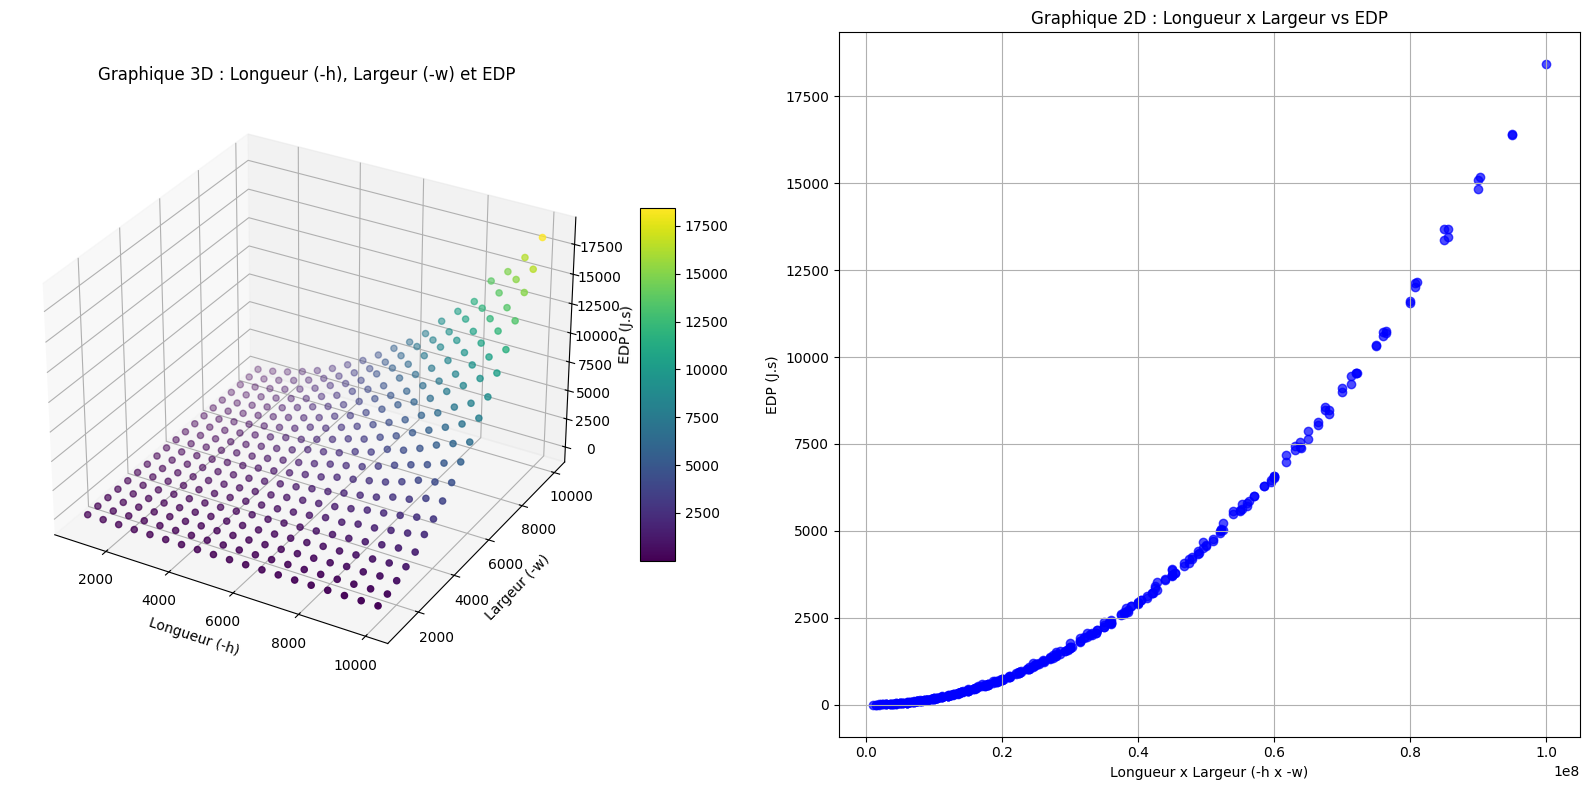

In [12]:
fig = plt.figure(figsize=(16, 8))

ax_3d = fig.add_subplot(121, projection='3d')
scatter = ax_3d.scatter(data['-h'], data['-w'], data['EDP'], c=data['EDP'], cmap='viridis', marker='o')
ax_3d.set_title("Graphique 3D : Longueur (-h), Largeur (-w) et EDP", fontsize=12)
ax_3d.set_xlabel("Longueur (-h)")
ax_3d.set_ylabel("Largeur (-w)")
ax_3d.set_zlabel("EDP (J.s)")
fig.colorbar(scatter, ax=ax_3d, shrink=0.5, aspect=10)

ax_2d = fig.add_subplot(122)
ax_2d.scatter(data['-h'] * data['-w'], data['EDP'], c='blue', alpha=0.7)
ax_2d.set_title("Graphique 2D : Longueur x Largeur vs EDP", fontsize=12)
ax_2d.set_xlabel("Longueur x Largeur (-h x -w)")
ax_2d.set_ylabel("EDP (J.s)")
ax_2d.grid(True)

plt.tight_layout()
plt.show()


## Optimisation 1 : simplification calcul x y

In [15]:
data_opti1['EDP'] = data_opti1['time'] * data_opti1['energy']
data_opti1.head()

,command,time,energy,power,-h,-w,EDP
0,../fractal/fractal_simple,3.85,207.19,53.79,4500,4500,797.6815
1,../fractal/fractal_simple,4.22,227.39,53.92,4500,5000,959.5858
2,../fractal/fractal_simple,4.70,253.26,53.89,4500,5500,1190.3220
3,../fractal/fractal_simple,5.17,279.89,54.19,4500,6000,1447.0313
4,../fractal/fractal_simple,5.48,297.43,54.26,4500,6500,1629.9164


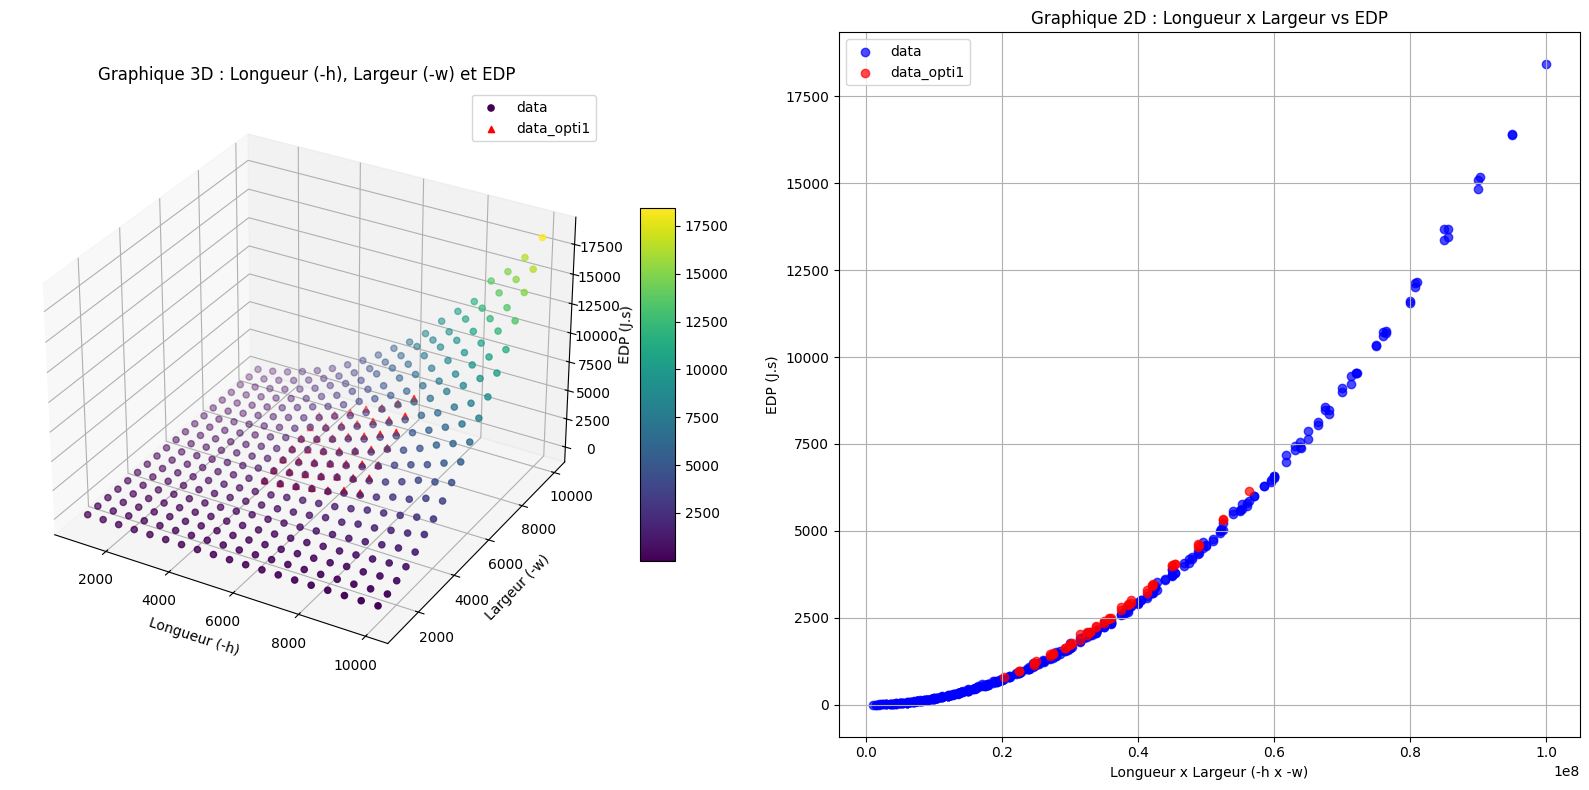

In [20]:
fig = plt.figure(figsize=(16, 8))

# 3D scatter plot
ax_3d = fig.add_subplot(121, projection='3d')
scatter = ax_3d.scatter(data['-h'], data['-w'], data['EDP'], c=data['EDP'], cmap='viridis', marker='o', label='data')
scatter_opti1 = ax_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['EDP'], c='red', marker='^', label='data_opti1')
ax_3d.set_title("Graphique 3D : Longueur (-h), Largeur (-w) et EDP", fontsize=12)
ax_3d.set_xlabel("Longueur (-h)")
ax_3d.set_ylabel("Largeur (-w)")
ax_3d.set_zlabel("EDP (J.s)")
fig.colorbar(scatter, ax=ax_3d, shrink=0.5, aspect=10)
ax_3d.legend()

# 2D scatter plot
ax_2d = fig.add_subplot(122)
ax_2d.scatter(data['-h'] * data['-w'], data['EDP'], c='blue', alpha=0.7, label='data')
ax_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['EDP'], c='red', alpha=0.7, label='data_opti1')
ax_2d.set_title("Graphique 2D : Longueur x Largeur vs EDP", fontsize=12)
ax_2d.set_xlabel("Longueur x Largeur (-h x -w)")
ax_2d.set_ylabel("EDP (J.s)")
ax_2d.grid(True)
ax_2d.legend()

plt.tight_layout()
plt.show()

## Optimisation 2 : low level calculation

In [19]:
data_opti2['EDP'] = data_opti2['time'] * data_opti2['energy']
data_opti2.head()

,command,time,energy,power,-h,-w,EDP
0,../fractal/fractal_simple,3.76,197.30,52.44,4500,4500,741.8480
1,../fractal/fractal_simple,4.23,226.60,53.55,4500,5000,958.5180
2,../fractal/fractal_simple,4.57,245.76,53.73,4500,5500,1123.1232
3,../fractal/fractal_simple,5.09,275.91,54.20,4500,6000,1404.3819
4,../fractal/fractal_simple,5.44,292.85,53.85,4500,6500,1593.1040


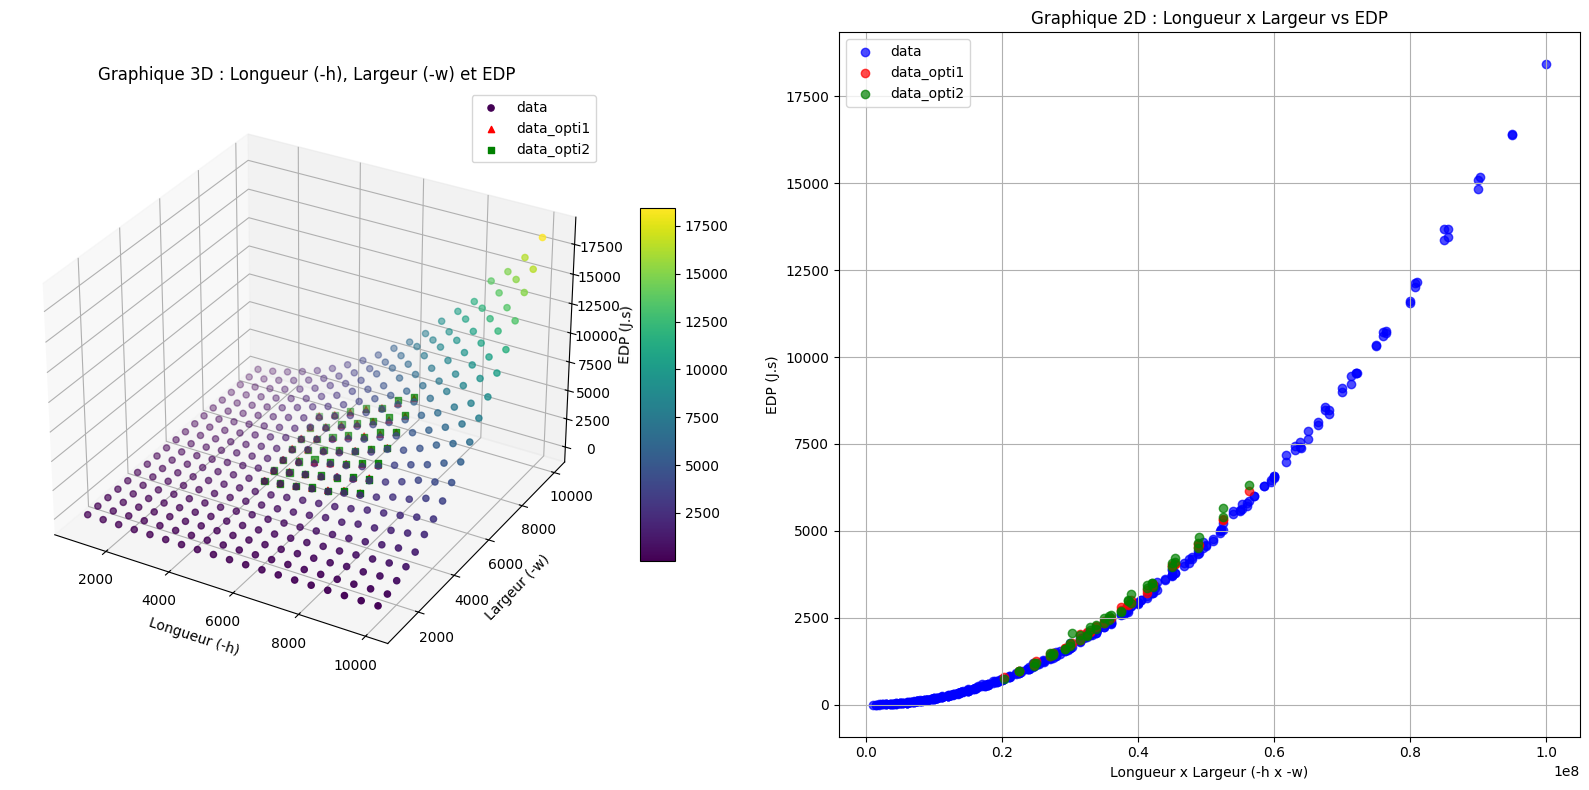

In [21]:
fig = plt.figure(figsize=(16, 8))

# 3D scatter plot
ax_3d = fig.add_subplot(121, projection='3d')
scatter = ax_3d.scatter(data['-h'], data['-w'], data['EDP'], c=data['EDP'], cmap='viridis', marker='o', label='data')
scatter_opti1 = ax_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['EDP'], c='red', marker='^', label='data_opti1')
scatter_opti2 = ax_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['EDP'], c='green', marker='s', label='data_opti2')
ax_3d.set_title("Graphique 3D : Longueur (-h), Largeur (-w) et EDP", fontsize=12)
ax_3d.set_xlabel("Longueur (-h)")
ax_3d.set_ylabel("Largeur (-w)")
ax_3d.set_zlabel("EDP (J.s)")
fig.colorbar(scatter, ax=ax_3d, shrink=0.5, aspect=10)
ax_3d.legend()

# 2D scatter plot
ax_2d = fig.add_subplot(122)
ax_2d.scatter(data['-h'] * data['-w'], data['EDP'], c='blue', alpha=0.7, label='data')
ax_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['EDP'], c='red', alpha=0.7, label='data_opti1')
ax_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['EDP'], c='green', alpha=0.7, label='data_opti2')
ax_2d.set_title("Graphique 2D : Longueur x Largeur vs EDP", fontsize=12)
ax_2d.set_xlabel("Longueur x Largeur (-h x -w)")
ax_2d.set_ylabel("EDP (J.s)")
ax_2d.grid(True)
ax_2d.legend()

plt.tight_layout()
plt.show()

## Optimisation 3

In [24]:
data_opti3['EDP'] = data_opti3['time'] * data_opti3['energy']
data_opti3.head()

,command,time,energy,power,-h,-w,EDP
0,../fractal/fractal_simple,3.76,197.30,52.44,4500,4500,741.8480
1,../fractal/fractal_simple,4.23,226.60,53.55,4500,5000,958.5180
2,../fractal/fractal_simple,4.57,245.76,53.73,4500,5500,1123.1232
3,../fractal/fractal_simple,5.09,275.91,54.20,4500,6000,1404.3819
4,../fractal/fractal_simple,5.44,292.85,53.85,4500,6500,1593.1040


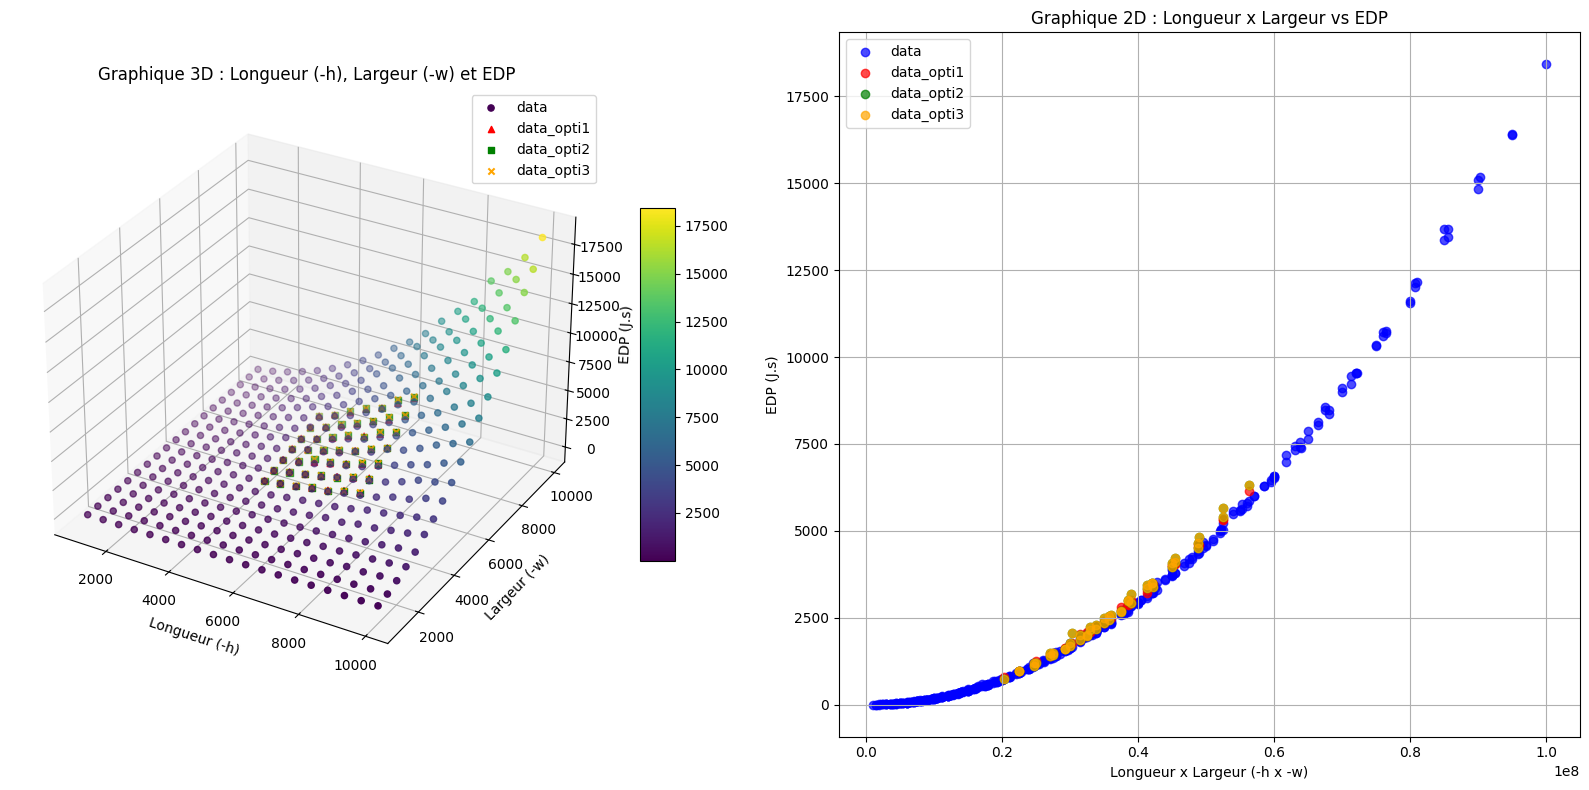

In [25]:
fig = plt.figure(figsize=(16, 8))

# 3D scatter plot
ax_3d = fig.add_subplot(121, projection='3d')
scatter = ax_3d.scatter(data['-h'], data['-w'], data['EDP'], c=data['EDP'], cmap='viridis', marker='o', label='data')
scatter_opti1 = ax_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['EDP'], c='red', marker='^', label='data_opti1')
scatter_opti2 = ax_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['EDP'], c='green', marker='s', label='data_opti2')
scatter_opti3 = ax_3d.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['EDP'], c='orange', marker='x', label='data_opti3')
ax_3d.set_title("Graphique 3D : Longueur (-h), Largeur (-w) et EDP", fontsize=12)
ax_3d.set_xlabel("Longueur (-h)")
ax_3d.set_ylabel("Largeur (-w)")
ax_3d.set_zlabel("EDP (J.s)")
fig.colorbar(scatter, ax=ax_3d, shrink=0.5, aspect=10)
ax_3d.legend()

# 2D scatter plot
ax_2d = fig.add_subplot(122)
ax_2d.scatter(data['-h'] * data['-w'], data['EDP'], c='blue', alpha=0.7, label='data')
ax_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['EDP'], c='red', alpha=0.7, label='data_opti1')
ax_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['EDP'], c='green', alpha=0.7, label='data_opti2')
ax_2d.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['EDP'], c='orange', alpha=0.7, label='data_opti3')
ax_2d.set_title("Graphique 2D : Longueur x Largeur vs EDP", fontsize=12)
ax_2d.set_xlabel("Longueur x Largeur (-h x -w)")
ax_2d.set_ylabel("EDP (J.s)")
ax_2d.grid(True)
ax_2d.legend()

plt.tight_layout()
plt.show()